# Pymaceuticals Inc.
---

### Analysis

- The bar graphs show that the majority of mice tested were using the drugs Capomulin and Ramicane, while the rest of the drugs had similar amounts. The pie charts show an almost even distribution of female and male mice tested. 

- The box plot shows that both infubinol and Ceftamin were the most effective.

- There's a positive correlation between mouse weight and the averate tumor voume size with a value of 0.84.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mice = merged_df["Mouse ID"].nunique()
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dupe_mice_id = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dupe_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dupe_mice_df = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
dupe_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"].isin(dupe_mice_id) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
regimen_group = clean_df.groupby("Drug Regimen")

mean = regimen_group["Tumor Volume (mm3)"].mean()
median = regimen_group["Tumor Volume (mm3)"].median()
variance = regimen_group["Tumor Volume (mm3)"].var()
std_dev = regimen_group["Tumor Volume (mm3)"].std()
sem = regimen_group["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std_dev,
    "Tumor Volume Std. Err.": sem
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

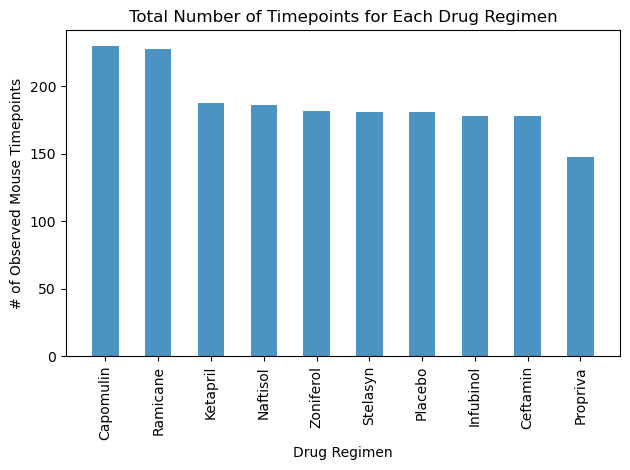

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_df["Drug Regimen"].value_counts()

regimen_counts.plot(kind="bar",alpha=0.8, align="center")

plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.xlim(-0.75, len(regimen_counts)-0.25)
plt.tight_layout()

plt.show()

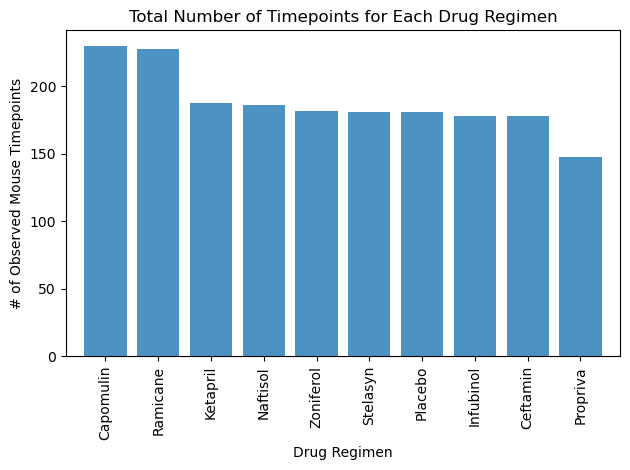

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = regimen_counts.index
y_axis = regimen_counts.values

plt.bar(x_axis, y_axis, alpha=0.8, align="center")

# Add labels and title
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.tight_layout()

plt.show()

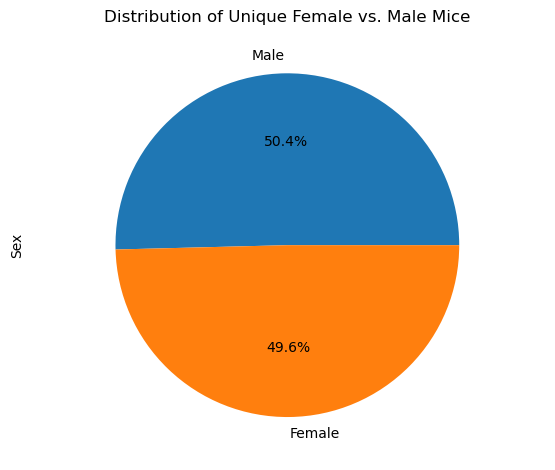

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_mice = clean_df[["Mouse ID", "Sex"]].drop_duplicates()
unique_mice = gender_mice["Sex"].value_counts()

# Make the pie chart
unique_mice.plot(kind="pie", autopct="%1.1f%%")

plt.ylabel("Sex")
plt.title("Distribution of Unique Female vs. Male Mice")
plt.xlim(-1.5, len(unique_mice)-0.5)
plt.tight_layout()

plt.show()

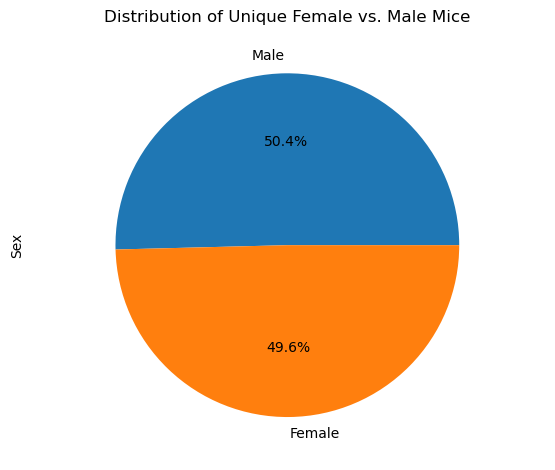

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_mice = clean_df[["Mouse ID", "Sex"]].drop_duplicates()
unique_mice = gender_mice["Sex"].value_counts()

# Make the pie chart
plt.pie(unique_mice, labels=["Male", "Female"], autopct="%1.1f%%")

plt.ylabel("Sex")
plt.title("Distribution of Unique Female vs. Male Mice")
plt.xlim(-1.5, len(unique_mice)-0.5)
plt.tight_layout()

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_per_mouse = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_data = pd.merge(last_timepoint_per_mouse, clean_df)
last_timepoint_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

final_tumor_volumes = last_timepoint_data[last_timepoint_data["Drug Regimen"].isin(treatments)]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # add subset
    tumor_vol_data.append(treatment_data)

    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    print(f"Drug Regimen: {treatment}")
    print(f"Lower quartile: {round(lowerq,2)}")
    print(f"Upper quartile: {round(upperq,2)}")
    print(f"IQR: {round(iqr,2)}")
    print(f"Values below {round(lower_bound,2)} or above {round(upper_bound,2)} could be outliers.")
    print(f"Potential outliers: {outliers}\n")

Drug Regimen: Capomulin
Lower quartile: 32.38
Upper quartile: 40.16
IQR: 7.78
Values below 20.7 or above 51.83 could be outliers.
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Drug Regimen: Ramicane
Lower quartile: 31.56
Upper quartile: 40.66
IQR: 9.1
Values below 17.91 or above 54.31 could be outliers.
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Drug Regimen: Infubinol
Lower quartile: 54.05
Upper quartile: 65.53
IQR: 11.48
Values below 36.83 or above 82.74 could be outliers.
Potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Drug Regimen: Ceftamin
Lower quartile: 48.72
Upper quartile: 64.3
IQR: 15.58
Values below 25.36 or above 87.67 could be outliers.
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



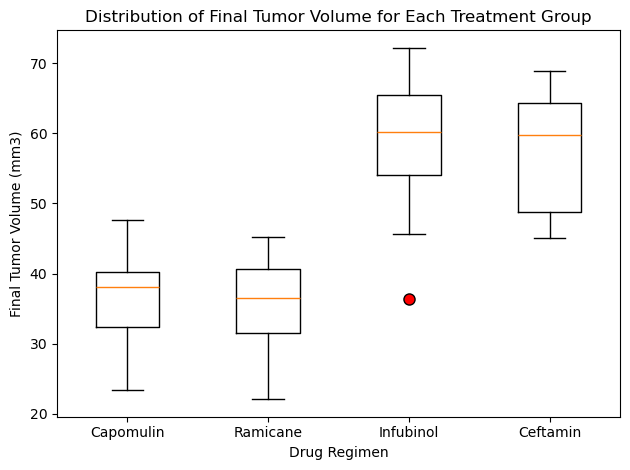

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, flierprops=dict(marker="o", markersize=8, markerfacecolor="r"))

plt.title("Distribution of Final Tumor Volume for Each Treatment Group")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.tight_layout()

plt.show()

## Line and Scatter Plots

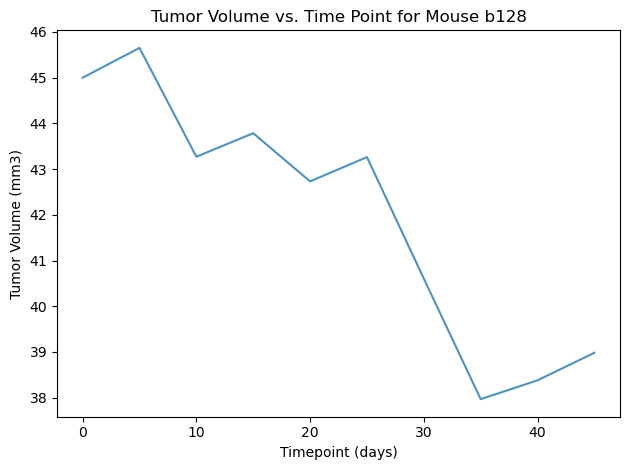

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", "Mouse ID"].iloc[0]

# Get the data for that specific mouse
mouse_data = clean_df.loc[clean_df["Mouse ID"] == capomulin_mouse]

# Generate a line plot for tumor volume vs. time point
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], alpha=0.8)

plt.title(f"Tumor Volume vs. Time Point for Mouse {capomulin_mouse}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()

plt.show()

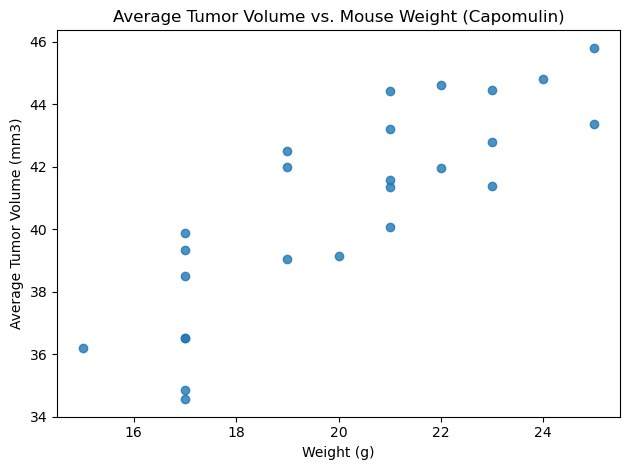

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

# Group by Mouse ID and calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume with the corresponding mouse weight
mouse_weight = capomulin_data[["Mouse ID", "Weight (g)"]].drop_duplicates()
merged_capomulin_data = pd.merge(avg_tumor_volume, mouse_weight, on="Mouse ID")

plt.scatter(merged_capomulin_data["Weight (g)"], merged_capomulin_data["Tumor Volume (mm3)"], alpha=0.8)

plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


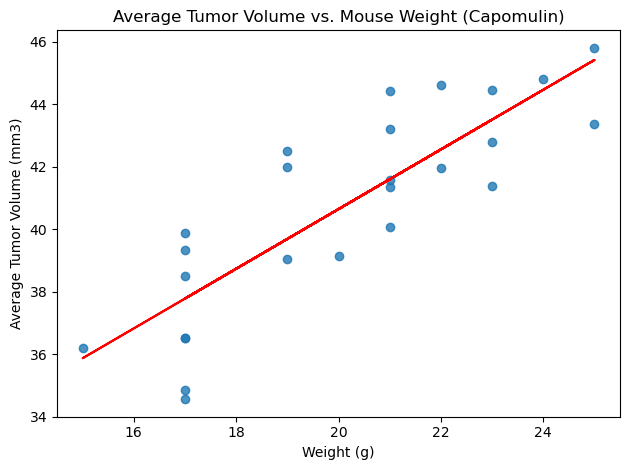

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = merged_capomulin_data["Weight (g)"]
y_values = merged_capomulin_data["Tumor Volume (mm3)"]

# Calculate the Pearson correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Generate predicted values for the regression line
regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values, alpha=0.8)
plt.plot(x_values, regress_values, color="r")

plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()

plt.show()